<a href="https://colab.research.google.com/github/Sriram823/Facebook-Ad-Optimization/blob/main/Upper_Confidence_Bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound

##Importing Libraries

In [24]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

##Importing Dataset

In [25]:
dataset = pd.read_csv('New Facebook Ads Optimization.csv')

##Implementation

In [48]:
import math as m
T = 100
num_ads = 10
ads_selected = []

numbers_of_selections = [0] * num_ads
sums_of_rewards = [0] * num_ads
total_rewards = 0

for n in range(0, T):
  ad = 0
  max_upper_confidence_bound = 0
  for i in range(0, num_ads):
    if (numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = m.sqrt(3/2 * (m.log(n + 1) / numbers_of_selections[i]))
      upper_confidence_bound = average_reward + delta_i
    else:
      upper_confidence_bound = 1e400
    if (upper_confidence_bound > max_upper_confidence_bound):
      max_upper_confidence_bound = upper_confidence_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  temp_rewards = dataset.values[n,ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + temp_rewards
  total_rewards = total_rewards + temp_rewards

#Histogram Visualization

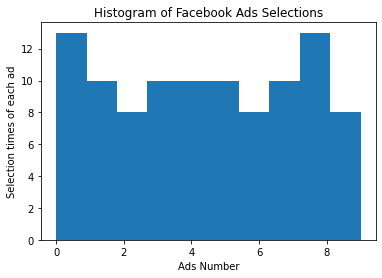

In [49]:
plt.hist(ads_selected)
plt.title('Histogram of Facebook Ads Selections')
plt.xlabel('Ads Number')
plt.ylabel('Selection times of each ad')
plt.show()